# **Car Price Prediction**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import seaborn as sns  # For enhanced data visualization
from wordcloud import WordCloud, STOPWORDS  # For creating word clouds
import missingno as msno  # For visualizing missing values
from datetime import datetime  # For working with dates and times
import warnings  # For suppressing warnings
warnings.filterwarnings('ignore')
from google.colab.data_table import DataTable  # For increasing visible columns in DataFrame
DataTable.max_columns = 30
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import gdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_id = "1VbbotnzFRHoDmUXpPVkWAYN9RbUS5Bl1"

# Download the file from Google Drive
url = f"https://drive.google.com/uc?id={file_id}"
output = "car_prediction.csv"
gdown.download(url, output, quiet=False)

# Now read the downloaded CSV file
car = pd.read_csv("car_prediction.csv")

Downloading...
From: https://drive.google.com/uc?id=1VbbotnzFRHoDmUXpPVkWAYN9RbUS5Bl1
To: /content/car_prediction.csv
100%|██████████| 2.20M/2.20M [00:00<00:00, 38.0MB/s]


In [ ]:
car.shape

(19237, 18)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
#Summary statistics of Iris dataset
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
iris=car.drop_duplicates(keep='first')

In [ ]:
# Dataset Duplicate Value Count
iris.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
iris.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

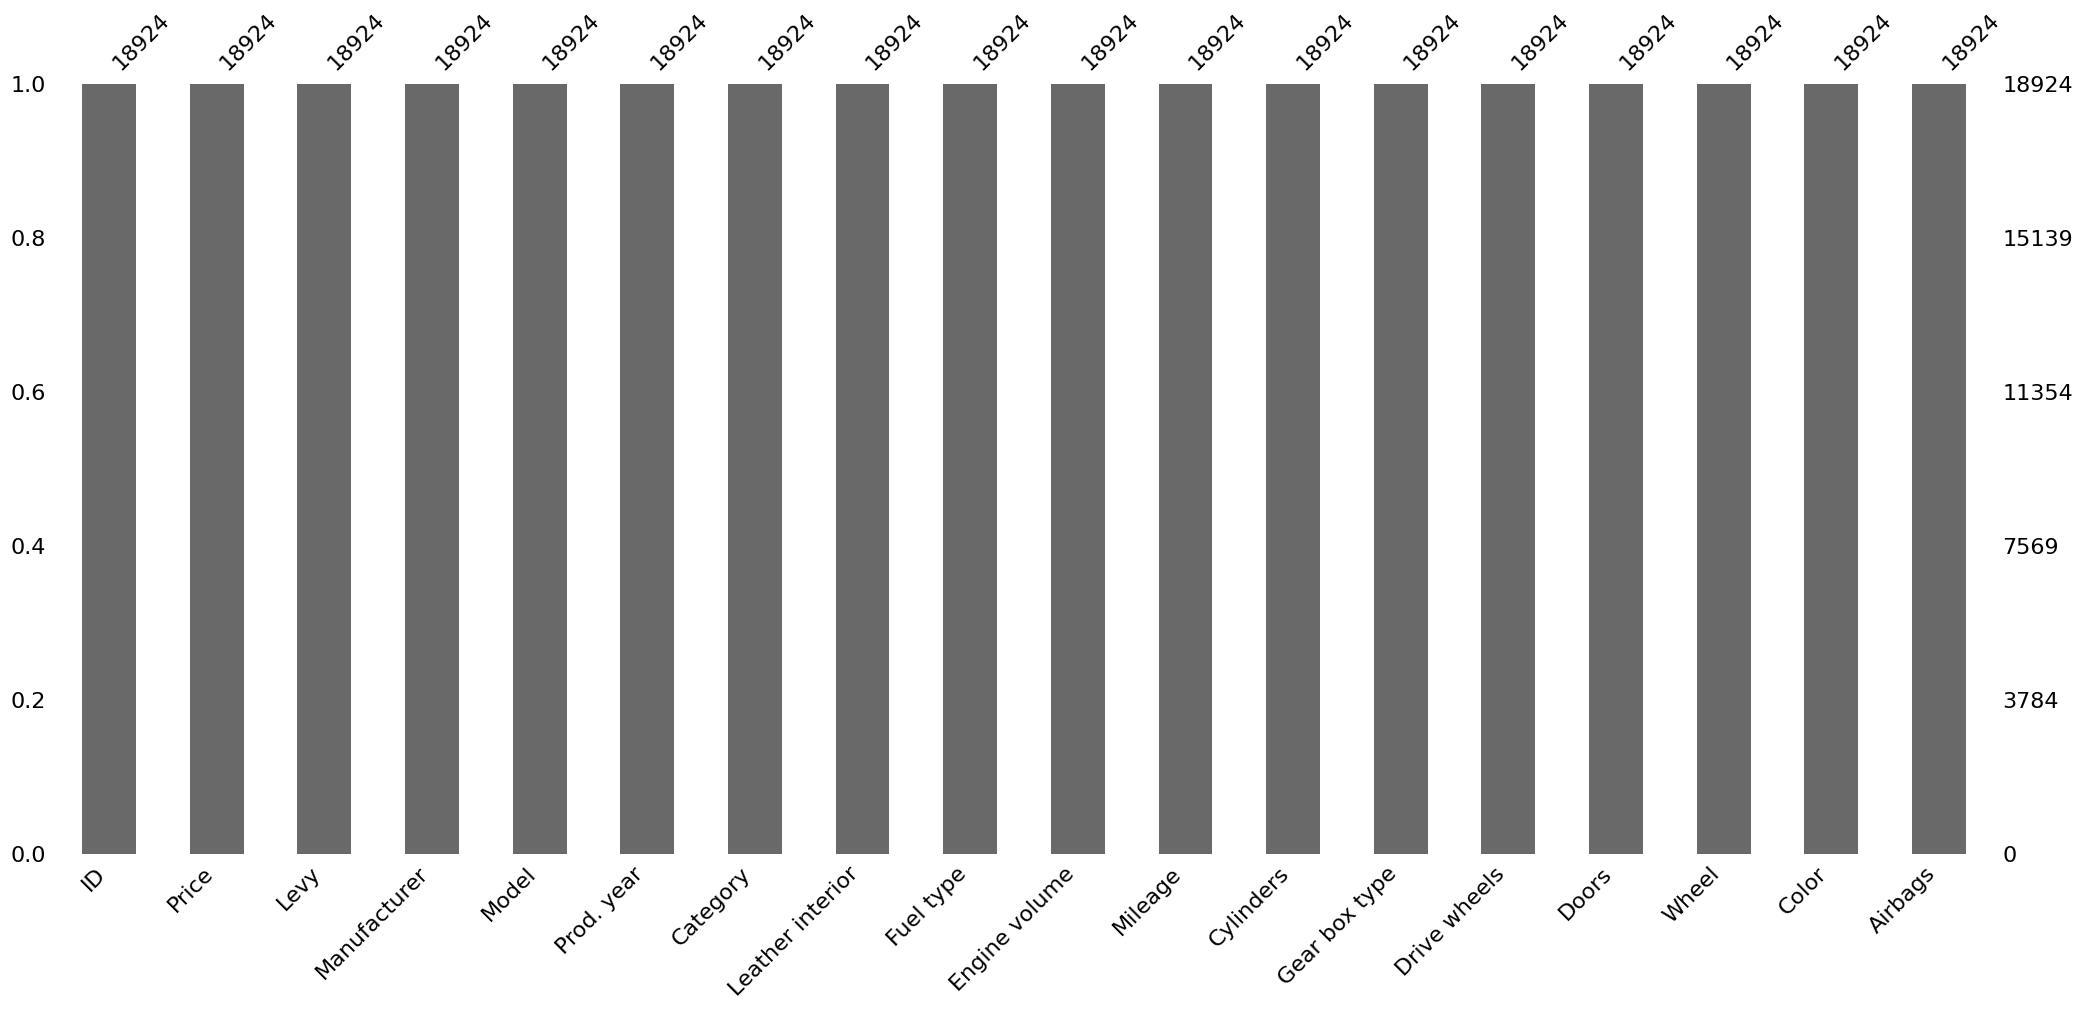

In [ ]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(iris);

In [ ]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a
unique_values(car)

COLUMN NAME (ID): 18924 unique values
COLUMN NAME (Price): 2315 unique values
COLUMN NAME (Levy): 559 unique values
COLUMN NAME (Manufacturer): 65 unique values
COLUMN NAME (Model): 1590 unique values
COLUMN NAME (Prod. year): 54 unique values
COLUMN NAME (Category): 11 unique values
COLUMN NAME (Leather interior): 2 unique values
COLUMN NAME (Fuel type): 7 unique values
COLUMN NAME (Engine volume): 107 unique values
COLUMN NAME (Mileage): 7687 unique values
COLUMN NAME (Cylinders): 13 unique values
COLUMN NAME (Gear box type): 4 unique values
COLUMN NAME (Drive wheels): 3 unique values
COLUMN NAME (Doors): 3 unique values
COLUMN NAME (Wheel): 2 unique values
COLUMN NAME (Color): 16 unique values
COLUMN NAME (Airbags): 17 unique values


In [ ]:
# function for selecting all the numerical columns
def numerical_col(df):
  c = []
  for col in df.columns:
    if df[col].dtype =='int' or df[col].dtype =='float':
       c.append(col)
  return c
numerical_col(car)

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [ ]:
# function for selecting all the categorical columns
def categorical_col(df):
  d = []
  for col in df.columns:
    if df[col].dtype == 'O':
       d.append(col)
  return d

In [ ]:
categorical_col(car)

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [ ]:
# function for outlier removal using IQR method
def remove_outliers_iqr(df, columns):

    for col in columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [ ]:
car=remove_outliers_iqr(car,numerical_col(car))


In [ ]:
# writing a function to detect outliers using boxplot
def outlier_detection(df):
      for column in df.columns:
        plt.figure(figsize=(10, 6))  # figure size
        plt.boxplot(df[column])  # Generate the box plot
        plt.title(f'Outliers for {column}')  # Set the title
        plt.xlabel(column)  # Set the x-axis label
        plt.ylabel('Value ----->')  # Set the y-axis label
        plt.show()

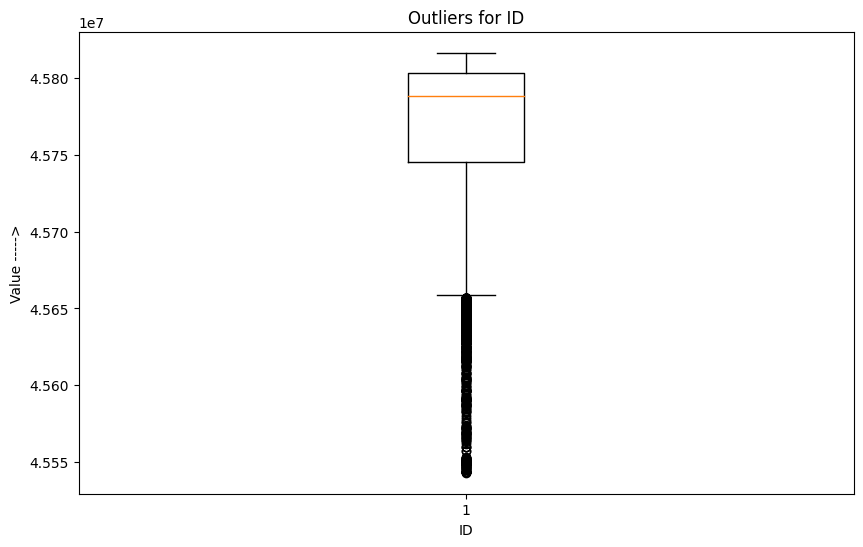

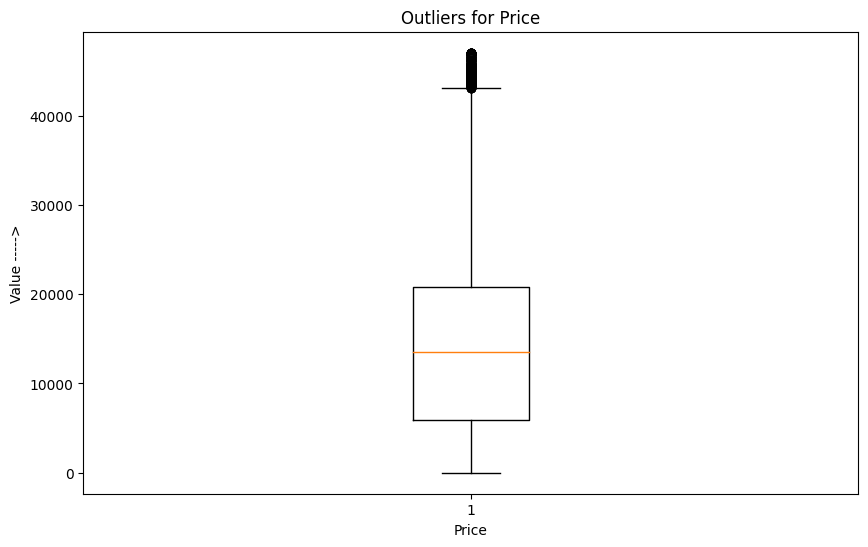

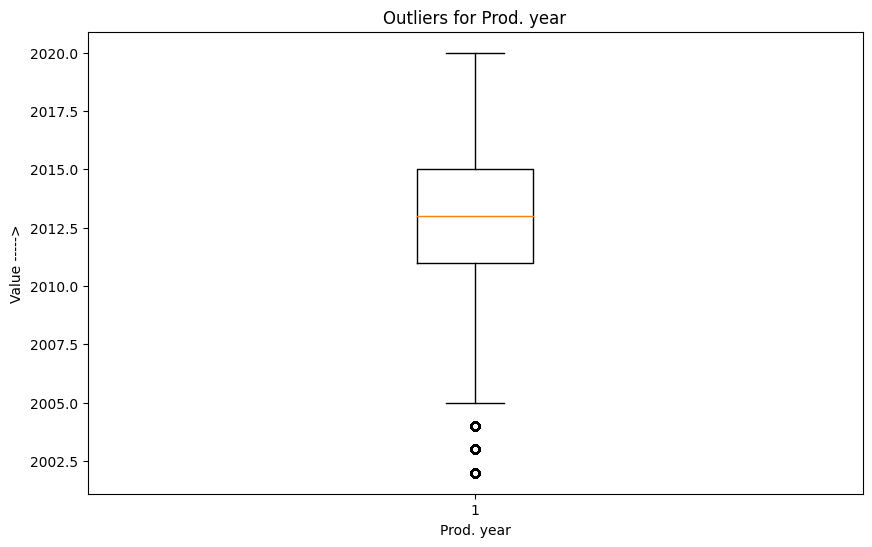

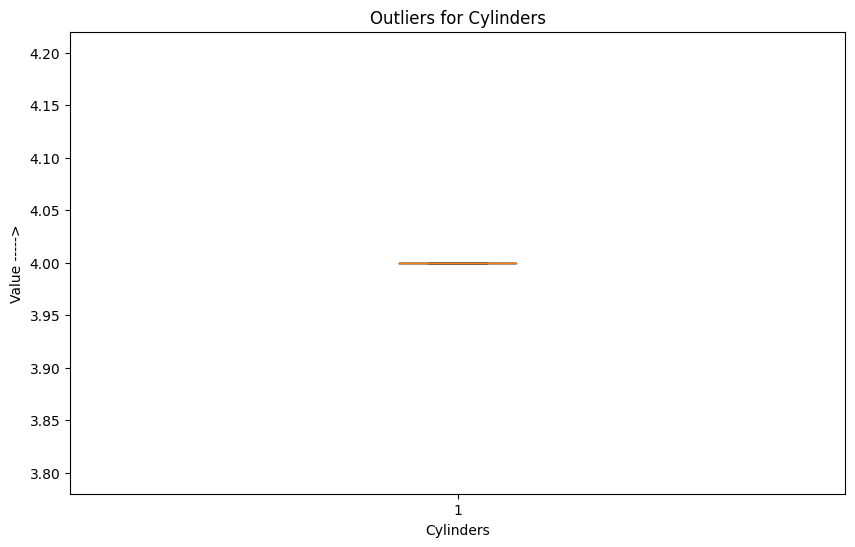

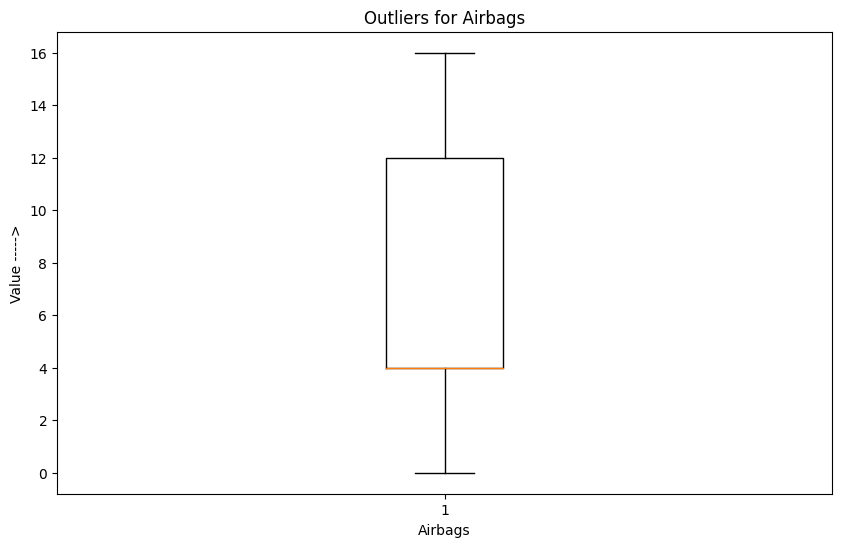

In [ ]:
outlier_detection(car[numerical_col(car)])

NameError: name 'car_no_outliers' is not defined

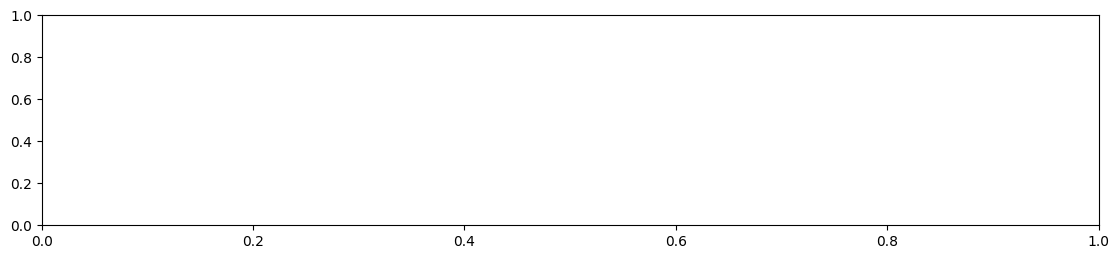

In [ ]:
# Histogram of Selling Price
plt.figure(figsize=(30, 6))
plt.subplot(2, 2, 1)
sns.histplot(car_no_outliers['price'], kde=True)
plt.title('Histogram of Selling Price');

In [ ]:
# function for outlier removal using IQR method
def remove_outliers_iqr(car, columns):
    car_copy = car.copy() # Create a copy of the DataFrame to avoid modifying the original
    for col in columns:
        if car_copy[col].dtype != 'object':
            Q1 = car_copy[col].quantile(0.25)
            Q3 = car_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            car_copy = car_copy[(car_copy[col] >= lower_bound) & (car_copy[col] <= upper_bound)]

    return car_copy # Return the modified copy

In [ ]:
car_no_outliers = remove_outliers_iqr(car,numerical_col(car)) # Assign the result to a new variable

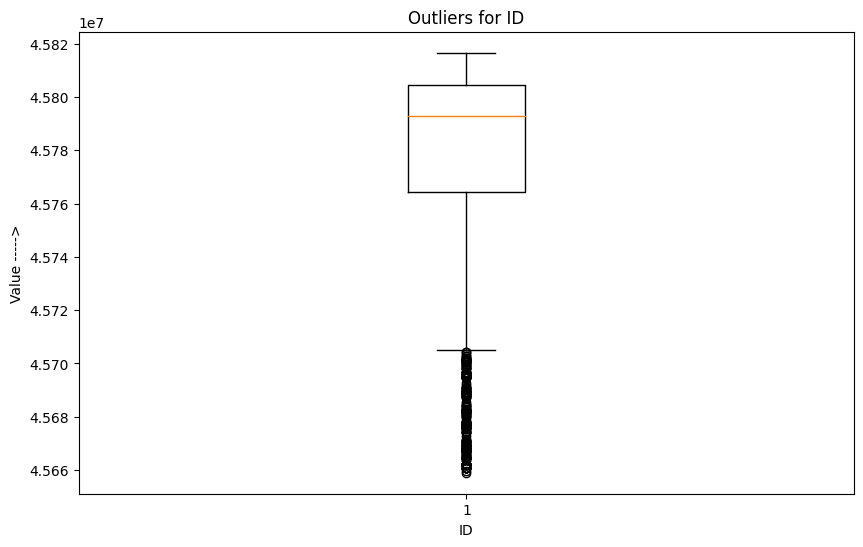

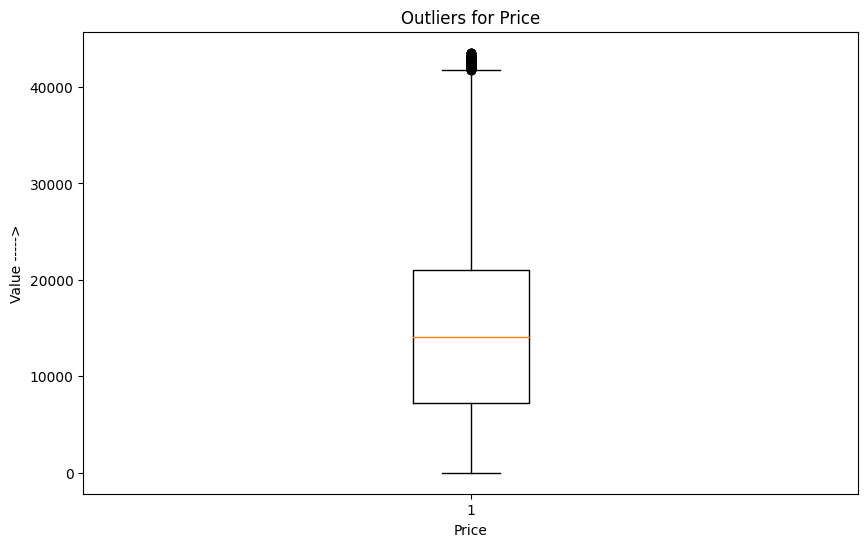

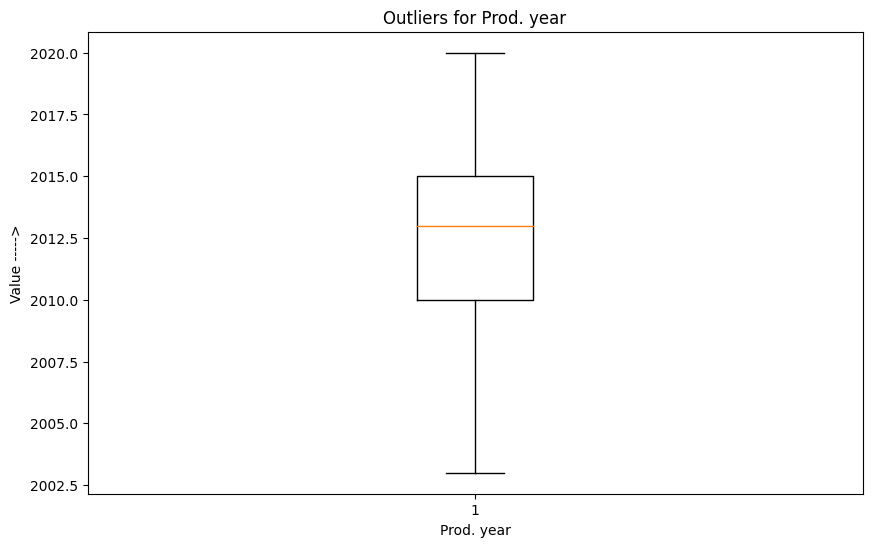

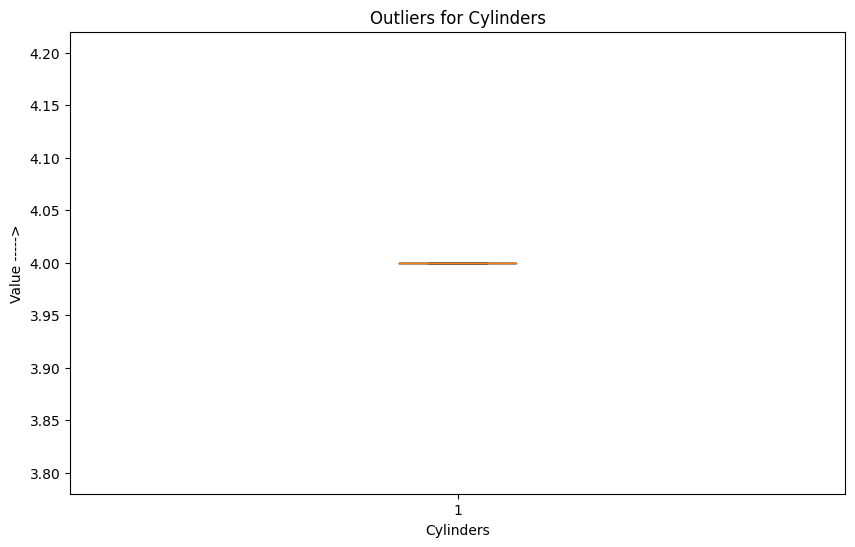

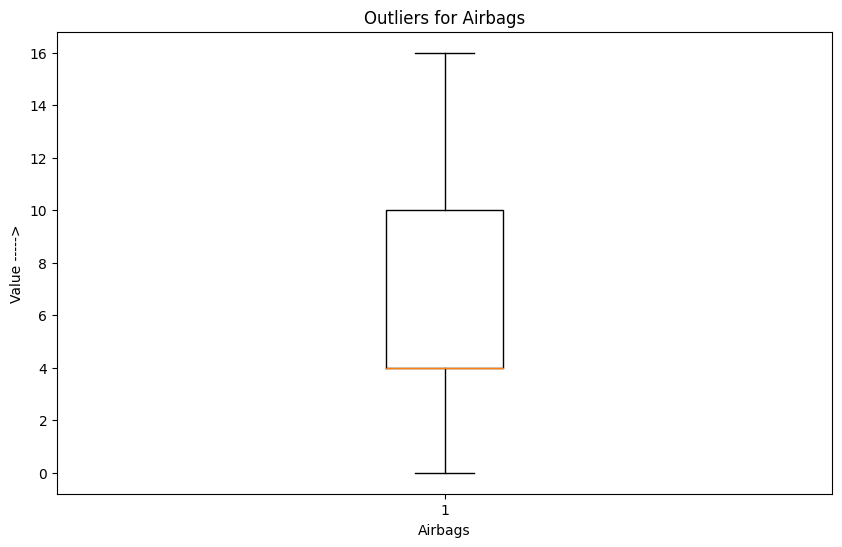

In [ ]:
outlier_detection(car_no_outliers[numerical_col(car_no_outliers)])

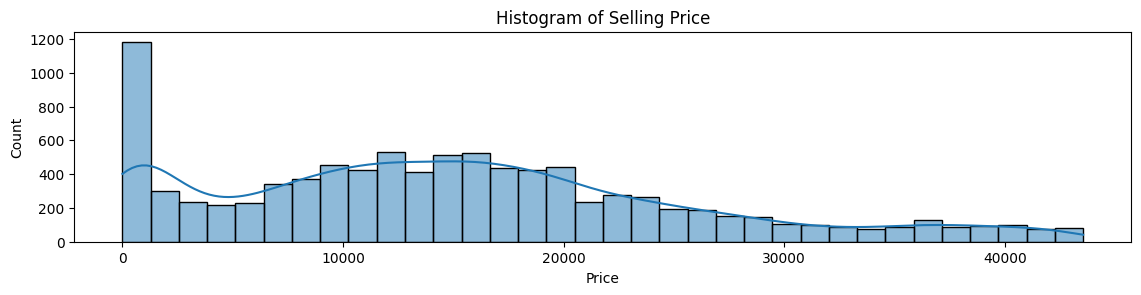

In [ ]:
# Histogram of Selling Price
plt.figure(figsize=(30, 6))
plt.subplot(2, 2, 1)
sns.histplot(car_no_outliers['Price'], kde=True) # Use the new DataFrame here
plt.title('Histogram of Selling Price');

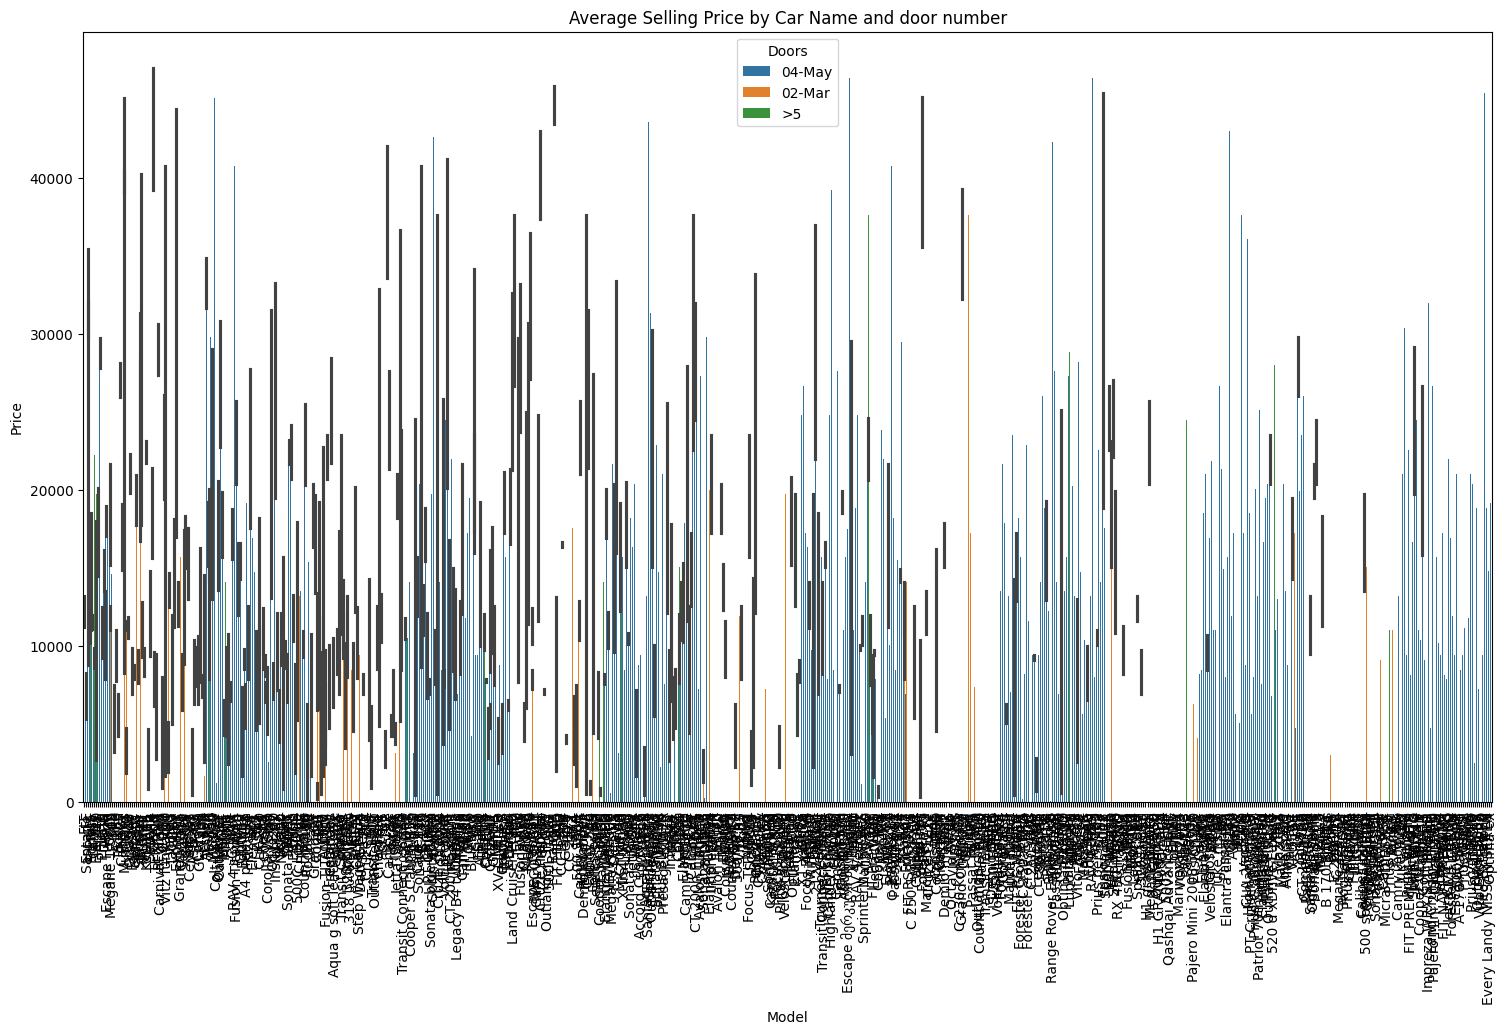

In [ ]:
# Average Selling Price by Car Name and Transmission
plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Price', hue='Doors', data=car)
plt.xticks(rotation=90)
plt.title('Average Selling Price by Car Name and door number');

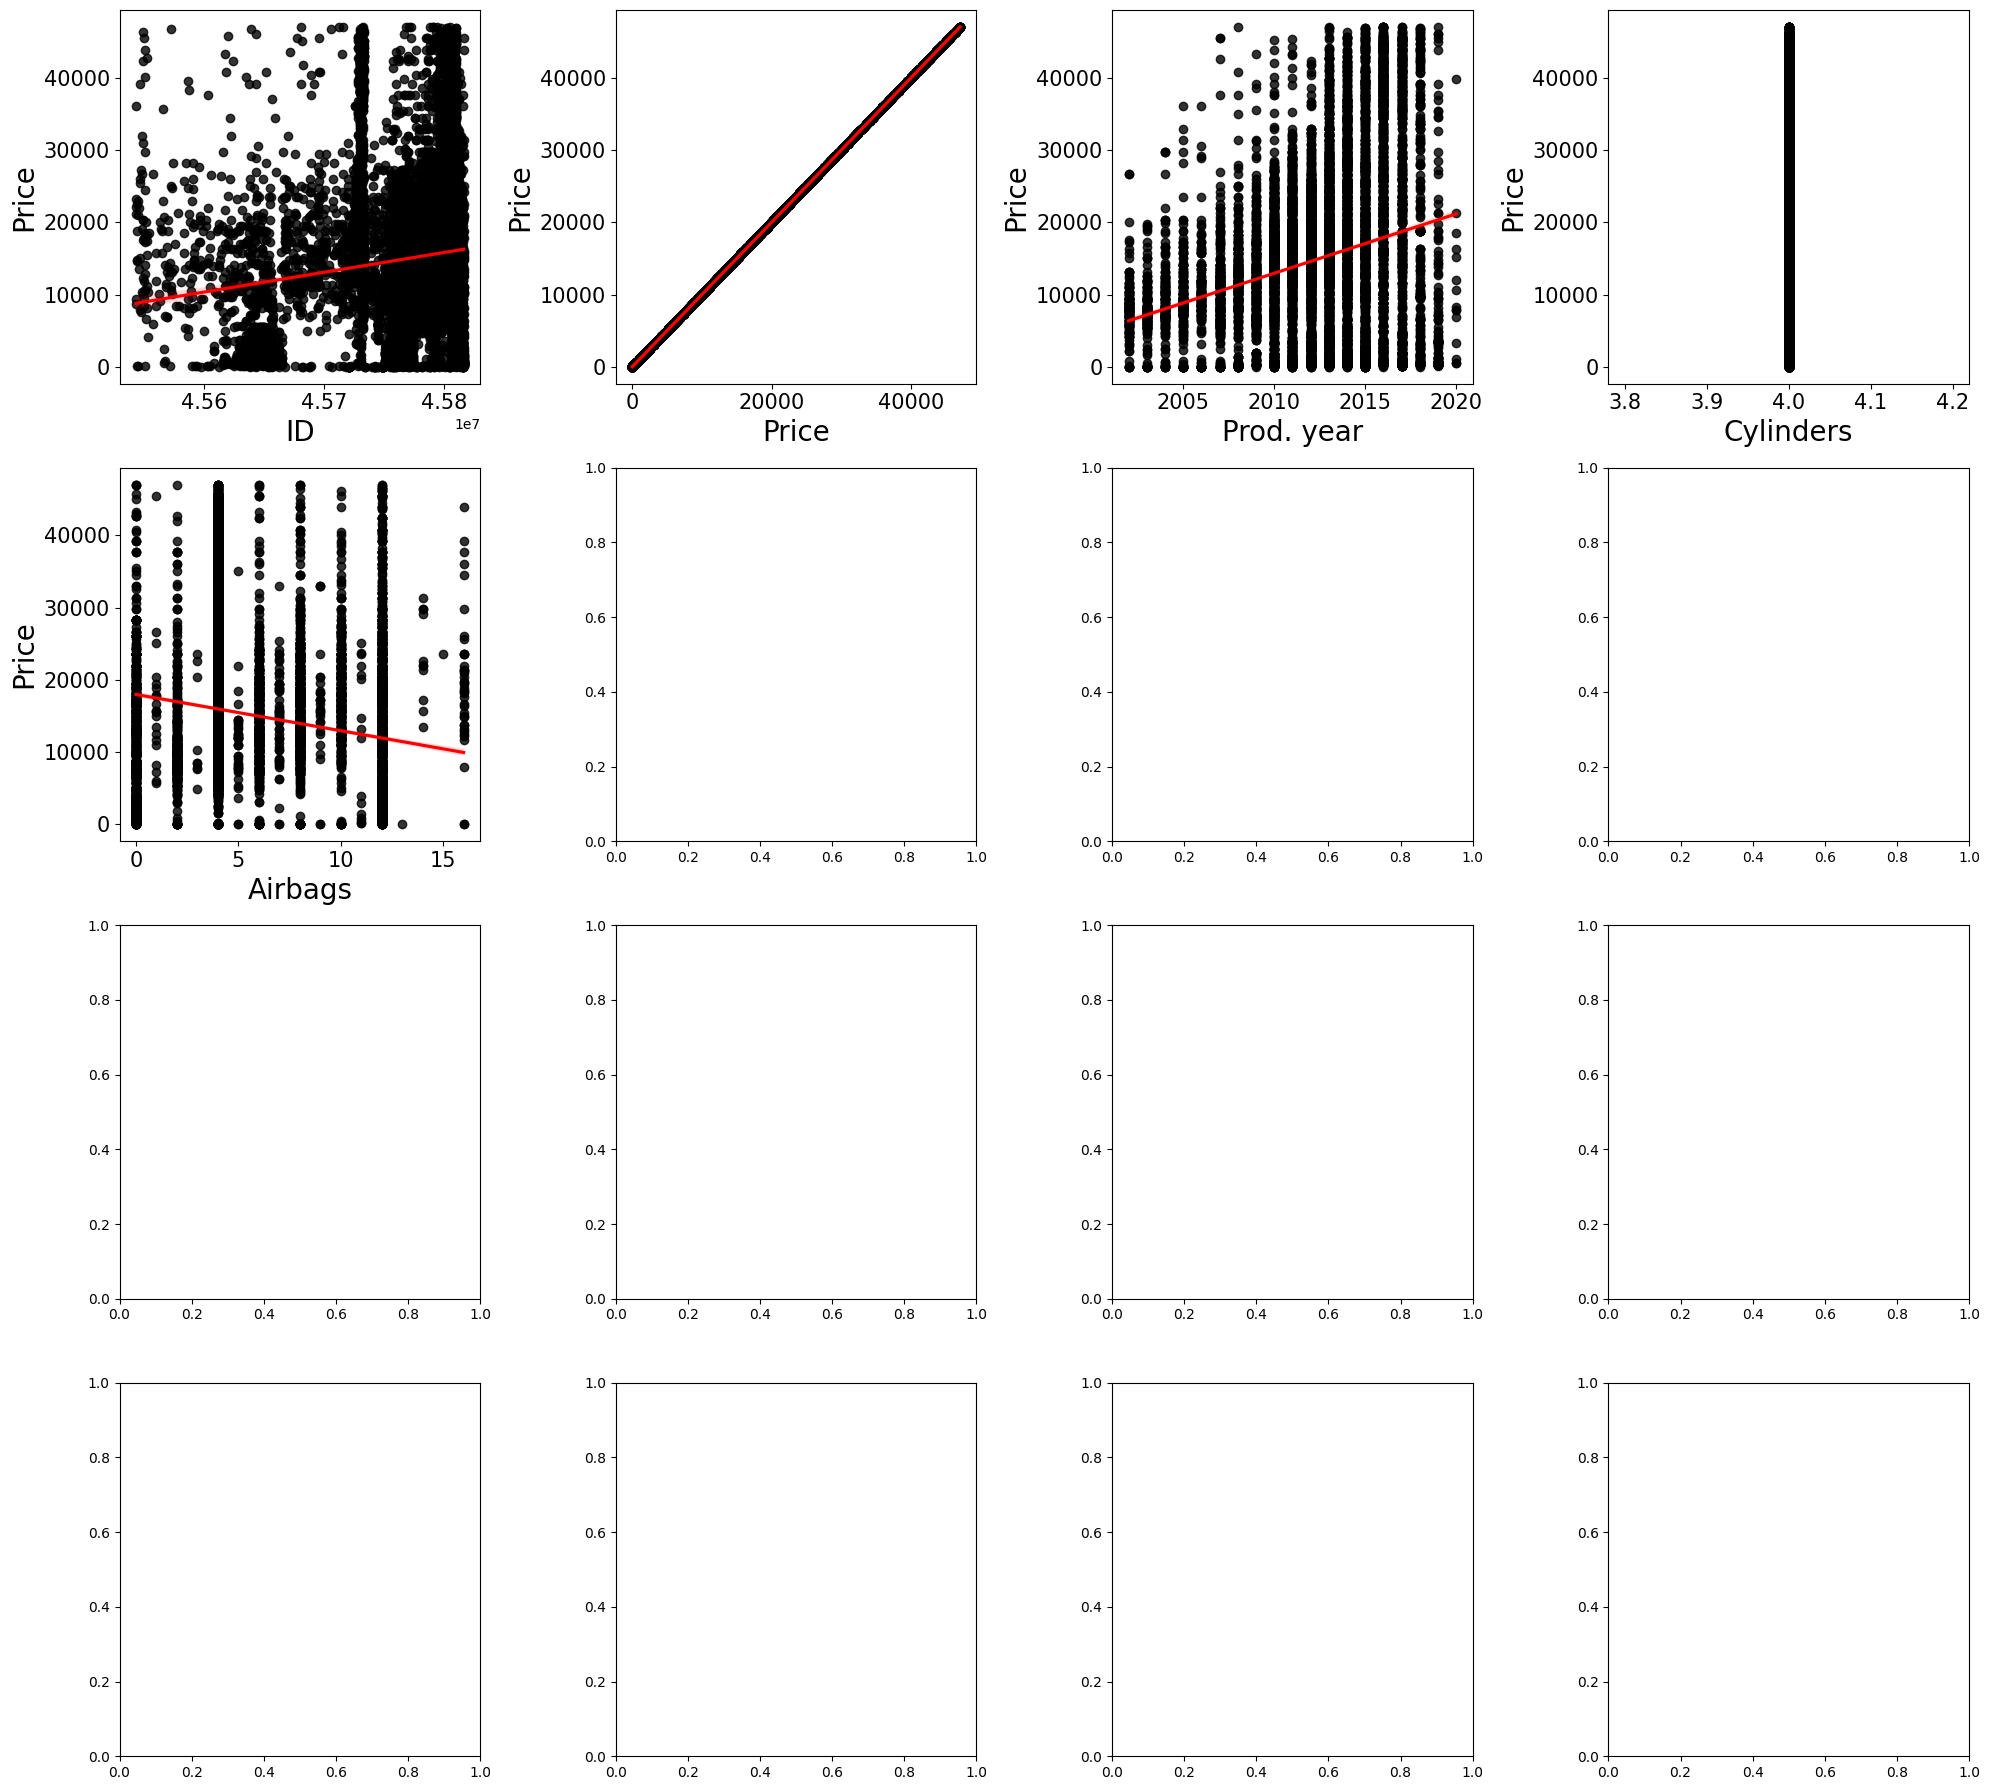

In [ ]:
# plotting regression subplots for every numerical column with respect to our target variable "Selling_Price" just to check the relationship between them
numeric_cols = car[numerical_col(car)]
fig, axs = plt.subplots(4, 4, figsize=(20,18), facecolor="white")
axs = axs.ravel()
for i, col in enumerate(numeric_cols.columns):
    sns.regplot(x=col, y="Price", data=numeric_cols, ax=axs[i], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    axs[i].tick_params(axis='x', colors='black', labelsize=15)
    axs[i].tick_params(axis='y', colors='black', labelsize=15)
    axs[i].set_xlabel(col, color='black', fontsize=20)
    axs[i].set_ylabel("Price", color='black', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
# Apply one-hot encoding to categorical features
cars = pd.get_dummies(car, drop_first=True)

# **Random Forest Classifier With GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
x = cars.drop('Price', axis=1)
y = cars['Price']

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
# You can also explore other imputation strategies or handle missing values during preprocessing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)

# Random Forest Regressor
rf = RandomForestRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV with Random Forest Regressor
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf = grid_search.best_estimator_
# Predict on the test set
y_pred = best_rf.predict(x_test)

# Evaluation metrics

r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error for test data : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R_square for test data : {r2}')


Mean Absolute Error for test data : 3464.162427272727
Mean Squared Error for test data : 28701936.700754948
Root Mean Squared Error for test data : 5357.418846865993
R_square for test data : 0.7799091132074685


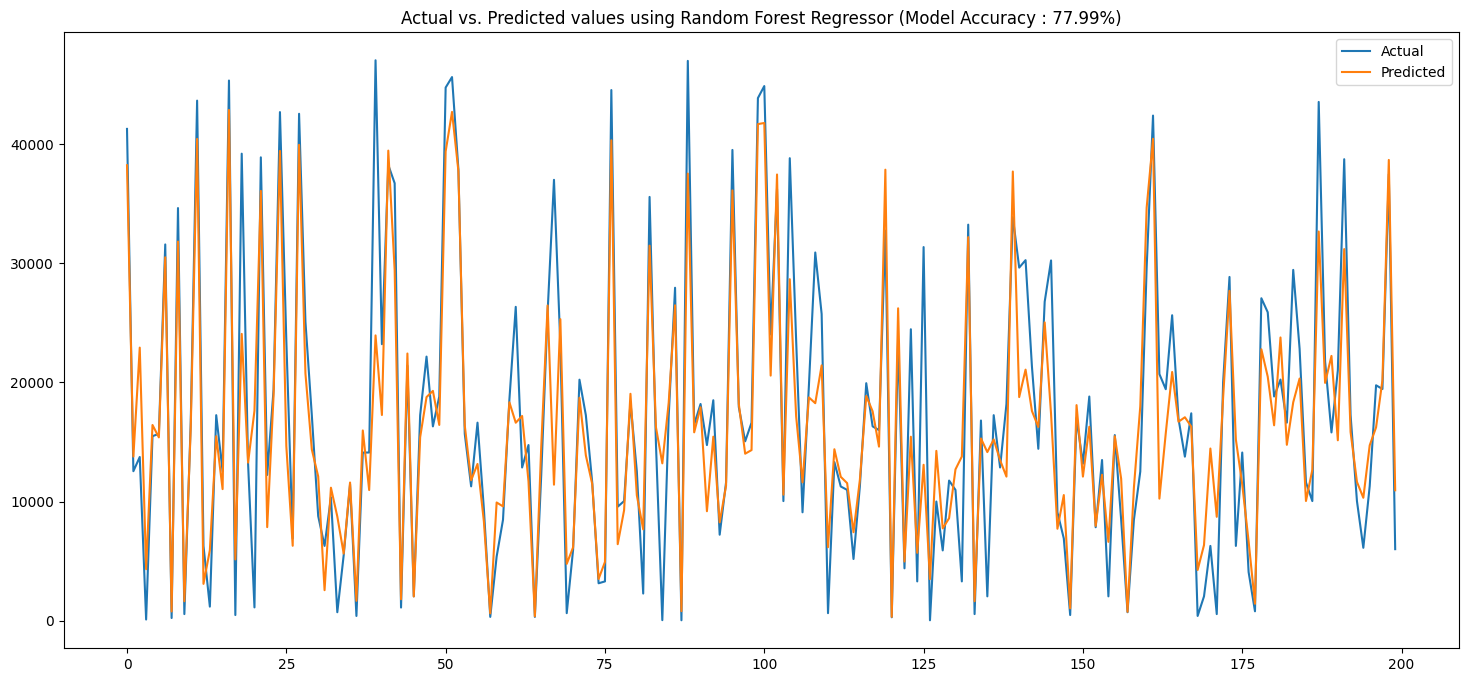

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(np.array(y_test[:200]), label='Actual')
plt.plot(np.array(y_pred[:200]), label='Predicted')
plt.title(f'Actual vs. Predicted values using Random Forest Regressor (Model Accuracy : {round(r2*100,2)}%)')
plt.legend()
plt.show()

In [ ]:
# Writing a function for training a model and to also check its performance
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# function for model fitting and testing
def model(algorithm,x_train_,y_train_,x_test_,y_test_):
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)

    # Appending results to Lists
    r_2.append(R_2)
    CV.append(cross_val.mean())

    # Evaluation metrics

    r2 = r2_score(y_test, y_pred)

    print(algorithm,"\n")
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    print(f'Mean Absolute Error for test data : {mean_absolute_error(y_test_,predicts)}')
    print(f'Mean Squared Error for test data : {mean_squared_error(y_test_,predicts)}')
    print(f'Root Mean Squared Error for test data : {np.sqrt(mean_squared_error(y_test,predicts))}')
    print(f'R_square for test data : {r2}')

    # Plot for actual vs prediction
    test_index=y_test_.reset_index()["Price"]
    ax=test_index.plot(label="Actual",figsize=(12,6),linewidth=2,color="b")
    ax=prediction[0].plot(label = "Prediction",figsize=(12,6),linewidth=2,color="y")
    plt.legend(loc='upper right')
    plt.title("Actual VS Prediction")
    plt.ylabel("values")
    plt.show()

RandomForestRegressor() 

r_2 score : 0.8063548985596758 

CV scores: [0.79811914 0.81154918 0.79517729 0.7916605  0.814721  ] 

CV scores mean: 0.8022454207217937
Mean Absolute Error for test data : 2854.6807454545456
Mean Squared Error for test data : 25253155.75283536
Root Mean Squared Error for test data : 5025.251809893248
R_square for test data : 0.7799091132074685


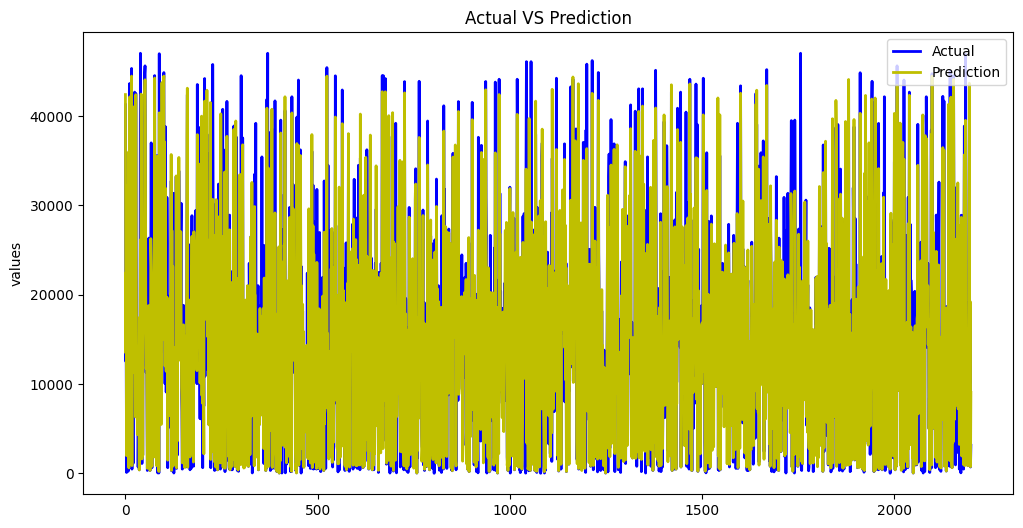

In [ ]:
#applying the above function
model(rf,x_train,y_train,x_test,y_test)

# **XGBoost With GridSearchCV**

In [ ]:
from xgboost import XGBRegressor
# XGBoost Regressor
xgb = XGBRegressor()

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model_dt = grid_search.best_estimator_


In [ ]:
model(best_model_dt,x_train,y_train,x_test,y_test)

# **Decision Tree With GridSearchCV**

In [1]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor
dt = DecisionTreeRegressor()

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model_dt = grid_search.best_estimator_


In [ ]:
model(best_model_dt,x_train,y_train,x_test,y_test)